In [1]:
%load_ext autoreload
%autoreload 2
from pipeline import get_maps, normalized, normalized_k, normalized_all, get_layer_repr, get_K_repr
from helpers import load_image, load_image2

import numpy as np

import matplotlib.pyplot as plt
#%autoreload 2
%matplotlib inline

#Datastructure
from collections import OrderedDict

import skimage


DATA_PATH = '../data/'

In [3]:
image1_path='../data/face/2.jpg'
image2_path='../data/face/8.jpg'

im1 = load_image2(image1_path, width=224)
im2 = load_image2(image2_path, width=224)

content_features = get_layer_repr(im1, layer_name="conv3_3")[0]
reference_features = get_layer_repr(im2, layer_name="conv3_3")[0]

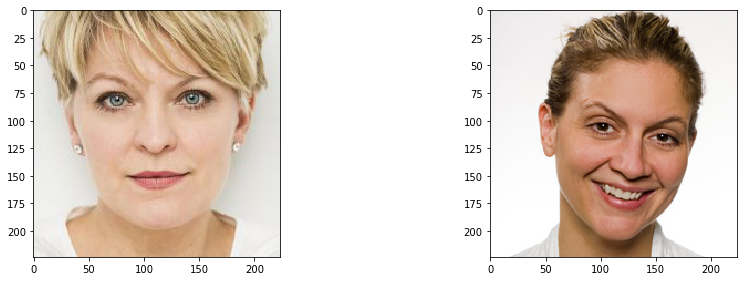

In [4]:
plt.figure(1,figsize=(15, 10))
plt.subplot(221)
plt.imshow(im1)

plt.subplot(222)
plt.imshow(im2)
plt.show()

In [5]:
channels = content_features.shape[2]
shape = content_features.shape[0]

content_features = content_features.reshape(-1, channels)
reference_features = reference_features.transpose(2,0,1).reshape( channels, -1)

#make zero mean version
content_features_zero_mean = content_features - content_features.mean()
reference_features_zero_mean = reference_features - reference_features.mean()

In [6]:
res = content_features.dot(reference_features)

K= 10
from sklearn import  decomposition
estimator = decomposition.NMF(n_components = K, init = 'random', tol=5e-3, random_state=0)    
W = estimator.fit_transform(res)
H = estimator.components_

W = W.reshape(K, shape, shape)
H = H.reshape(K, shape, shape)


In [14]:
H[1].reshape(-1).shape
reference_features[1].shape

(3136,)

TypeError: bar() missing 1 required positional argument: 'height'

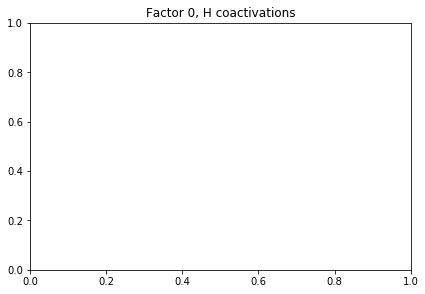

In [7]:
for i in range(0,K):

    W_coactivations = [np.mean(content_features[:,c]*W[i].reshape(-1)) for c in range(channels)]
    W_correlations = [np.mean(content_features_zero_mean[:,c]*(W[i].reshape(-1) - W[i].mean())) for c in range(channels)]
    
    H_coactivations = [np.mean(reference_features[c]*H[i].reshape(-1)) for c in range(channels)]
    H_correlations = [np.mean(reference_features_zero_mean[c]*(H[i].reshape(-1) - H[i].mean())) for c in range(channels)]

    # look at the historgrams
    plt.figure(figsize=(15, 10))
    plt.subplot(221)
    plt.title('Factor {}, H coactivations'.format(i))
    plt.bar(H_coactivations, bins=50)

    plt.subplot(222)
    plt.title('Factor {}, H correlations'.format(i))
    plt.bar(H_correlations, bins=50)

    plt.subplot(223)
    plt.title('Factor {}, W coactivations'.format(i))
    plt.bar(W_coactivations, bins=50)

    plt.subplot(224)
    plt.title('Factor {}, W correlations'.format(i))
    plt.bar(W_correlations, bins=50)
    
    

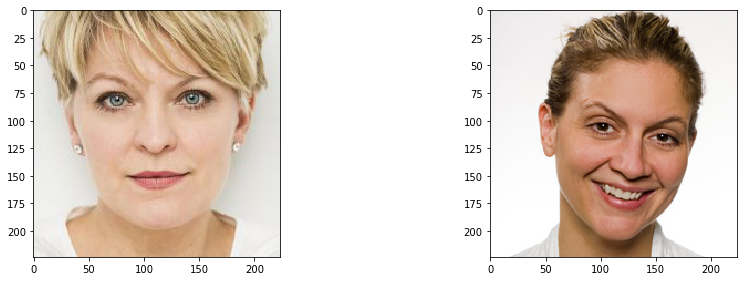

In [19]:
image1_path='../data/face/2.jpg'
image2_path='../data/face/8.jpg'

im1 = load_image2(image1_path, width=224)
im2 = load_image2(image2_path, width=224)

content_features = get_layer_repr(im1, layer_name="conv4_4")[0]
reference_features = get_layer_repr(im2, layer_name="conv4_4")[0]


plt.figure(1,figsize=(15, 10))
plt.subplot(221)
plt.imshow(im1)

plt.subplot(222)
plt.imshow(im2)
plt.show()


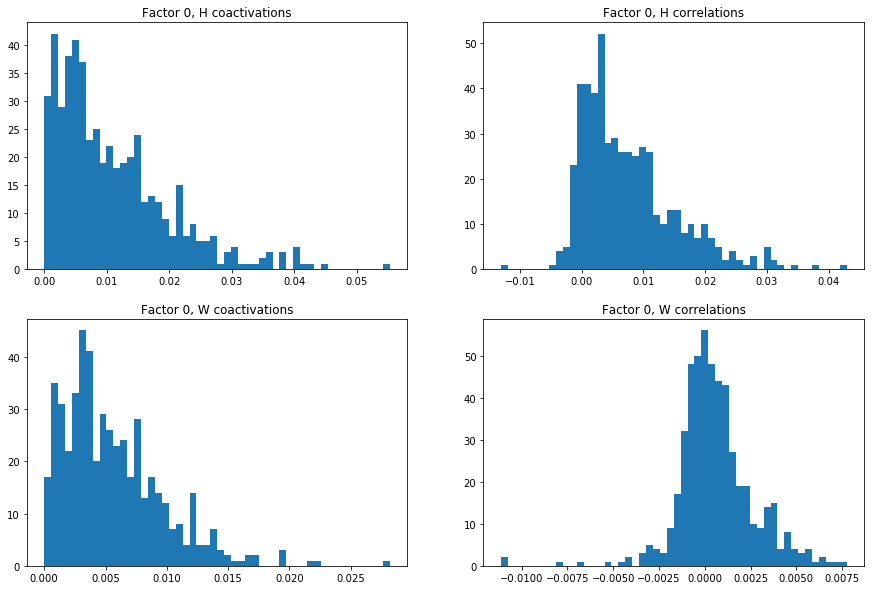

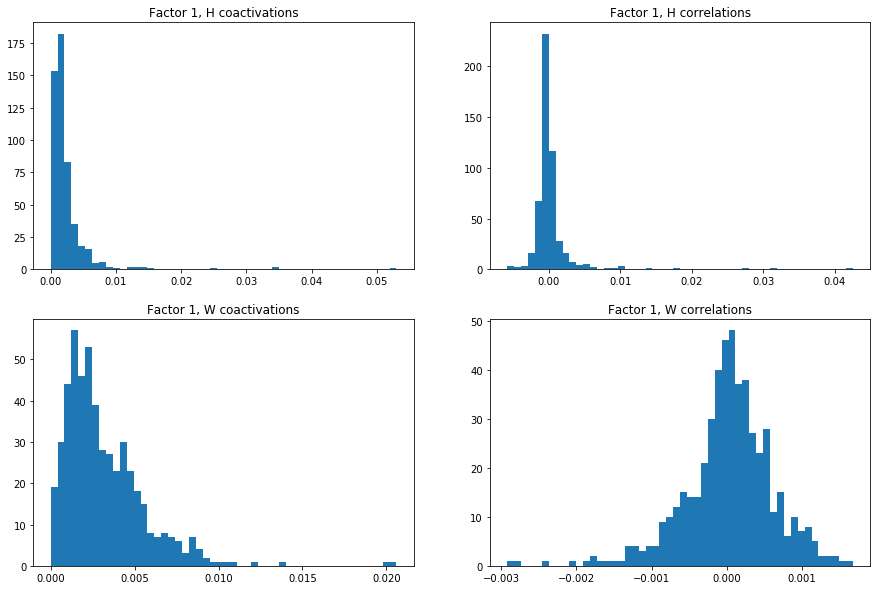

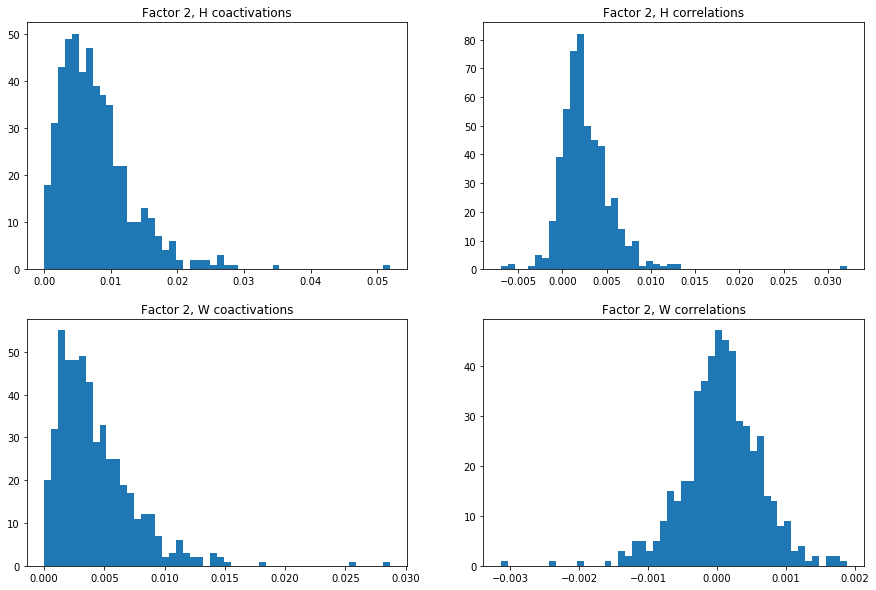

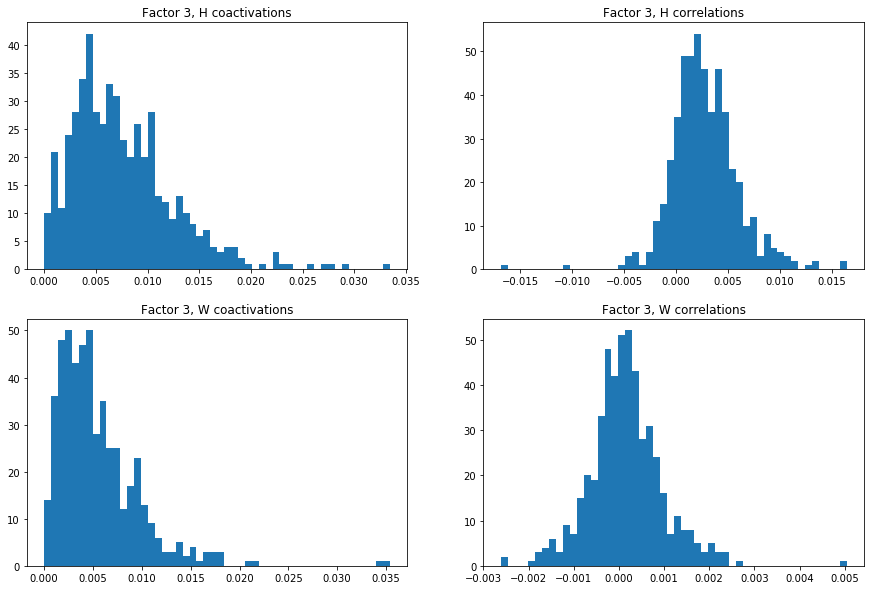

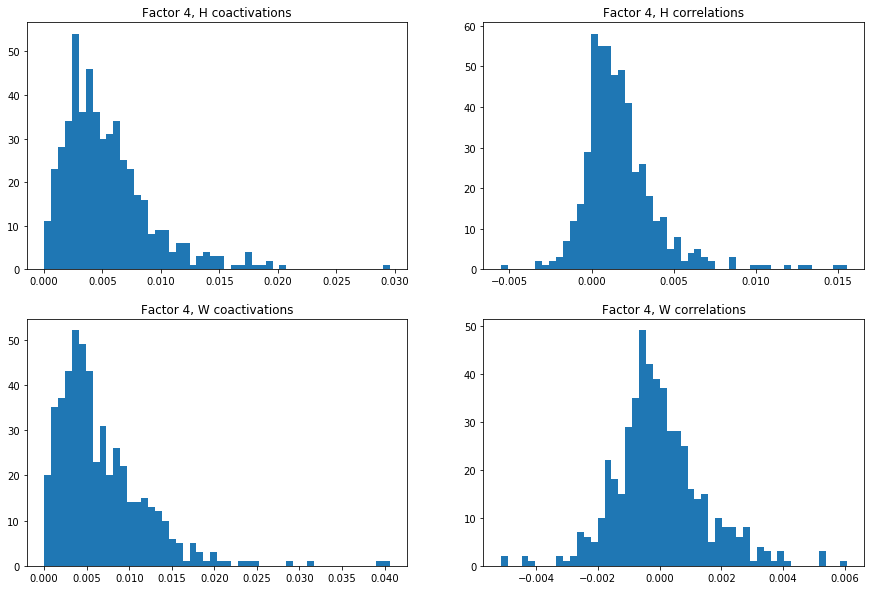

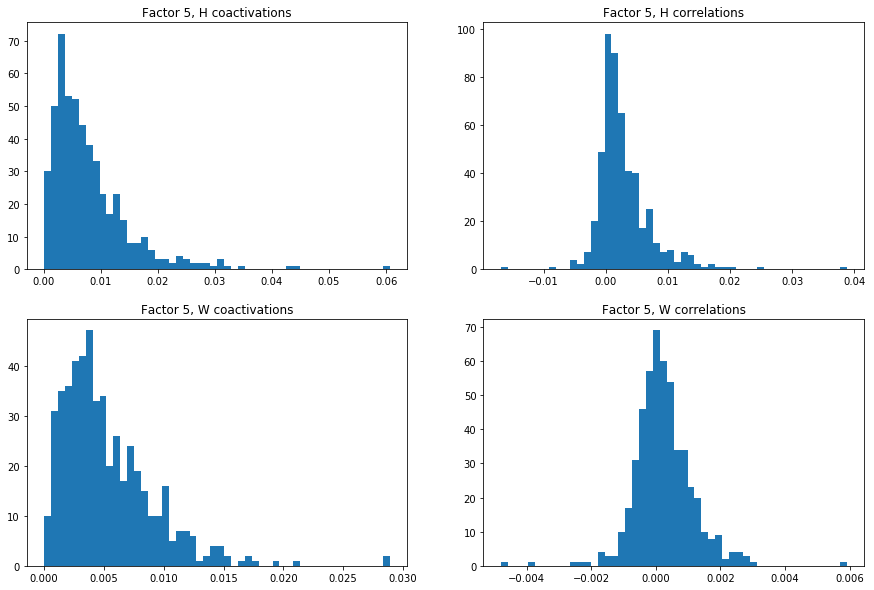

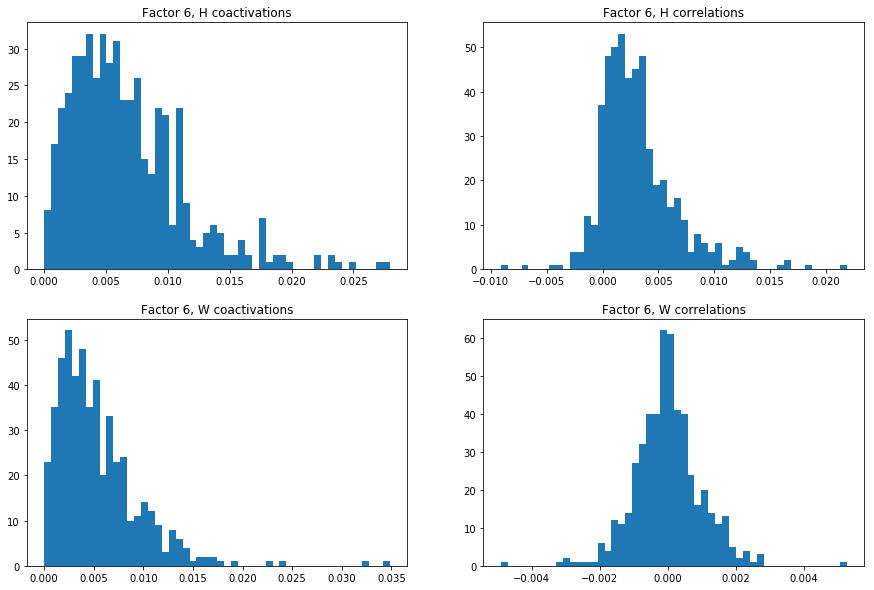

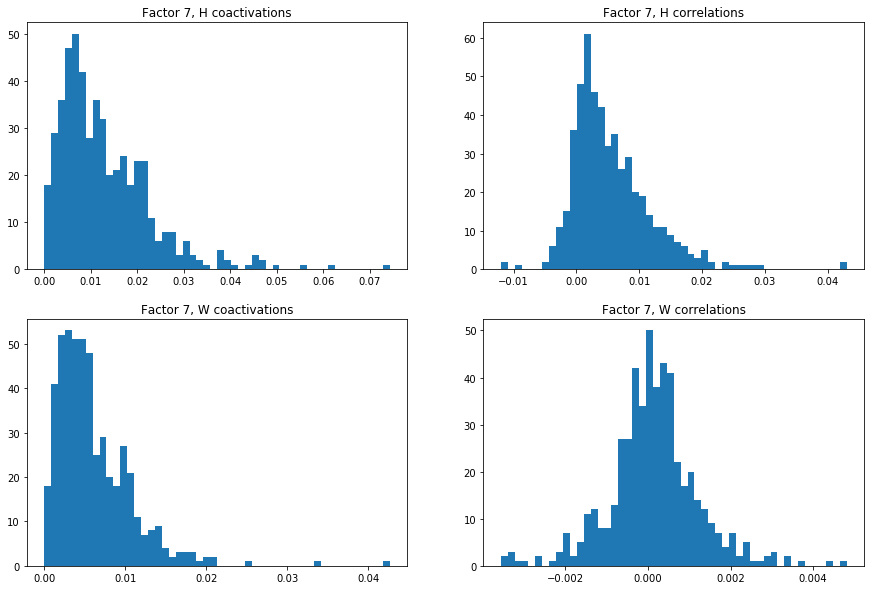

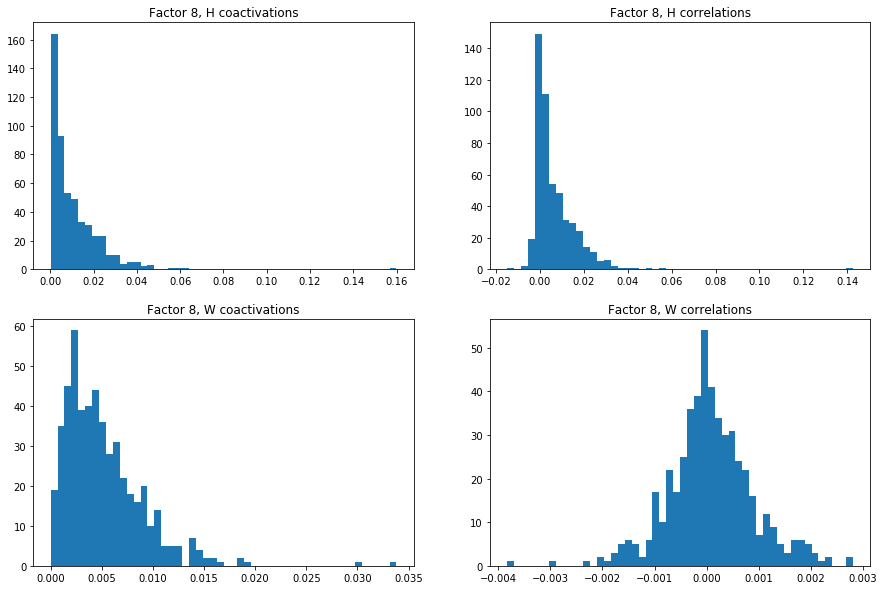

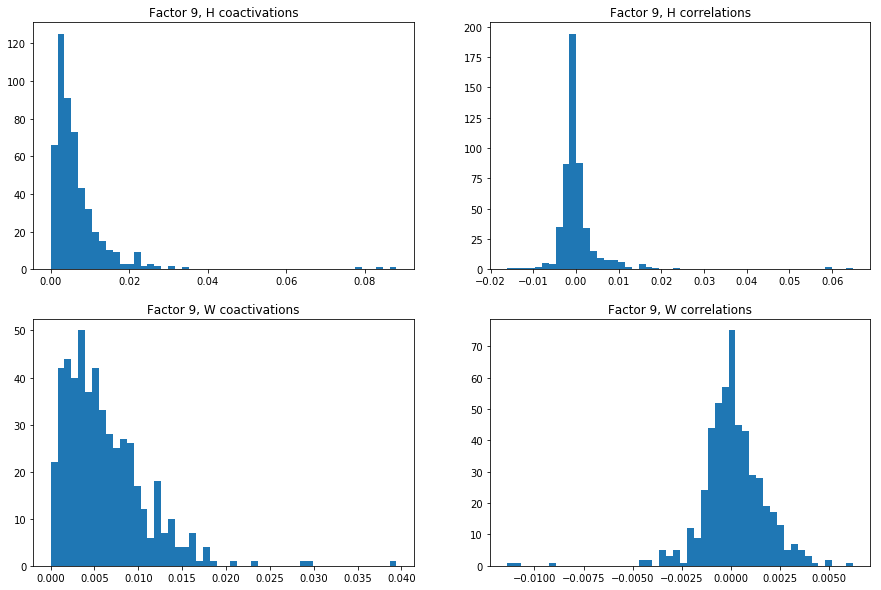

In [20]:
channels = content_features.shape[2]
shape = content_features.shape[0]

content_features = content_features.reshape(-1, channels)
reference_features = reference_features.transpose(2,0,1).reshape( channels, -1)

#make zero mean version
content_features_zero_mean = content_features - content_features.mean()
reference_features_zero_mean = reference_features - reference_features.mean()

res = content_features.dot(reference_features)

K= 10
from sklearn import  decomposition
estimator = decomposition.NMF(n_components = K, init = 'random', tol=5e-3, random_state=0)    
W = estimator.fit_transform(res)
H = estimator.components_

W = W.reshape(K, shape, shape)
H = H.reshape(K, shape, shape)

for i in range(0,K):

    W_coactivations = [np.mean(content_features[:,c]*W[i].reshape(-1)) for c in range(channels)]
    W_correlations = [np.mean(content_features_zero_mean[:,c]*(W[i].reshape(-1) - W[i].mean())) for c in range(channels)]
    
    H_coactivations = [np.mean(reference_features[c]*H[i].reshape(-1)) for c in range(channels)]
    H_correlations = [np.mean(reference_features_zero_mean[c]*(H[i].reshape(-1) - H[i].mean())) for c in range(channels)]

    # look at the historgrams
    plt.figure(figsize=(15, 10))
    plt.subplot(221)
    plt.title('Factor {}, H coactivations'.format(i))
    plt.hist(H_coactivations, bins=50)

    plt.subplot(222)
    plt.title('Factor {}, H correlations'.format(i))
    plt.hist(H_correlations, bins=50)

    plt.subplot(223)
    plt.title('Factor {}, W coactivations'.format(i))
    plt.hist(W_coactivations, bins=50)

    plt.subplot(224)
    plt.title('Factor {}, W correlations'.format(i))
    plt.hist(W_correlations, bins=50)
    
    